In [12]:
import pandas as pd


In [13]:
house = pd.read_csv("C:/Users/LOQ/Downloads/archive (1).zip")

In [14]:
#Understanding the Data
house.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [16]:
house.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [23]:
#Putting Feature Variable to x
X = house[['Square_Footage',	'Num_Bedrooms',	'Num_Bathrooms',  
           'Year_Built',	'Lot_Size',	'Garage_Size',	
           'Neighborhood_Quality']]
X.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [18]:
#Putting Response to Variable y
y = house['House_Price']
y.head()

0    2.623829e+05
1    9.852609e+05
2    7.779774e+05
3    2.296989e+05
4    1.041741e+06
Name: House_Price, dtype: float64

In [29]:
#Splitting Data into Testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, train_size = 0.7, random_state=0000)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 7)
(300,)
(300, 7)
(700,)


In [30]:
#Performing Linear Regressinon
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
#Coefficient Calculation
print(lr.intercept_)
print(lr.coef_)

-2036324.257728485
[  199.89752293 10129.74966922  8138.27797764  1006.0562455
 15041.29163418  4290.70513285   186.28318962]


so, House_price = −2,036,324.26 + 199.90 + 10,129.75  + 8,138.28 + 1,006.06 + 15,041.29 + 4,290.71 + 186.28 

In [33]:
#Predictions
y_pred = lr.predict(x_test)

In [34]:
type(y_pred)

numpy.ndarray

In [35]:
y_test.shape

(300,)

Text(0, 0.5, 'House Price')

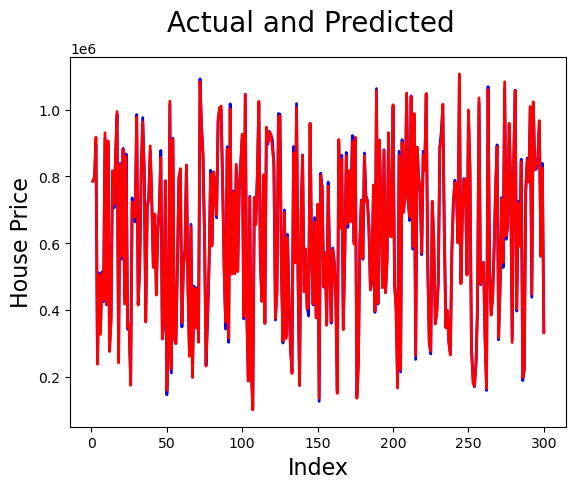

In [43]:
#Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range (1,301,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel("Index", fontsize=16)
plt.ylabel("House Price", fontsize=16)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

Text(0, 0.5, 'ytest-ypred')

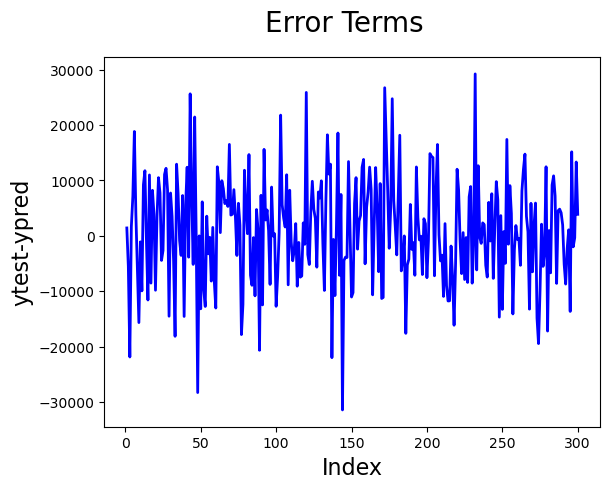

In [47]:
c = [i for i in range (1,301,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Index", fontsize=16)
plt.ylabel("ytest-ypred", fontsize=16)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [49]:
r_squared = r2_score(y_test,y_pred)

In [55]:
print("RMSE :", rmse)
print("R_Squared_Value :", r_squared)

RMSE : 9664.479507292104
R_Squared_Value : 0.998528286227121


In [ ]:
#Based on the RMSE, the house price predictions are off by an average of about $9,700.
#The R square indicates that the model explains about 99,85% of variance in house prices

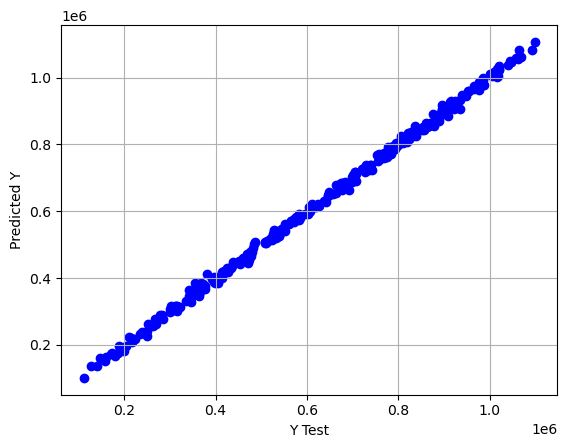

In [58]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred, c="blue")
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.grid()